In [9]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as K
import matplotlib.pyplot as plt

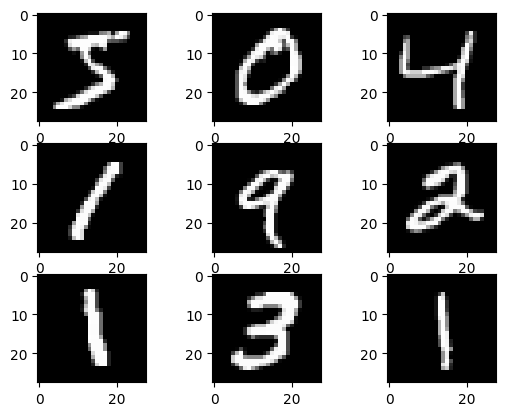

In [10]:
#Step 2: Load and Visualize Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualize the first 9 images in the dataset
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [11]:
#Step 3: Preprocess Data
#Reshape Data: Depending on the backend (channels first or last).
#Normalize Data: Scale pixel values to the range [0, 1].
#One-hot Encode Labels: Convert integer labels to one-hot encoded vectors.
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [12]:
#Step 4: Define and Build Models
#Model 1: Simple CNN
def build_model1(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
#Model 2: Deeper CNN with Dropout
def build_model2(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
#Model 3: CNN with More Layers
def build_model3(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
#Step 5: Train Models

# Instantiate models
model1 = build_model1(input_shape)
model2 = build_model2(input_shape)
model3 = build_model3(input_shape)

# Train models
history1 = model1.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=2)
history2 = model2.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=2)
history3 = model3.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=2)

Epoch 1/10
375/375 - 5s - 13ms/step - accuracy: 0.9313 - loss: 0.2355 - val_accuracy: 0.9728 - val_loss: 0.0914
Epoch 2/10
375/375 - 4s - 10ms/step - accuracy: 0.9785 - loss: 0.0724 - val_accuracy: 0.9805 - val_loss: 0.0667
Epoch 3/10
375/375 - 4s - 11ms/step - accuracy: 0.9850 - loss: 0.0505 - val_accuracy: 0.9824 - val_loss: 0.0589
Epoch 4/10
375/375 - 4s - 10ms/step - accuracy: 0.9883 - loss: 0.0374 - val_accuracy: 0.9836 - val_loss: 0.0556
Epoch 5/10
375/375 - 4s - 10ms/step - accuracy: 0.9918 - loss: 0.0283 - val_accuracy: 0.9839 - val_loss: 0.0531
Epoch 6/10
375/375 - 4s - 10ms/step - accuracy: 0.9936 - loss: 0.0206 - val_accuracy: 0.9837 - val_loss: 0.0556
Epoch 7/10
375/375 - 4s - 10ms/step - accuracy: 0.9946 - loss: 0.0170 - val_accuracy: 0.9854 - val_loss: 0.0546
Epoch 8/10
375/375 - 4s - 10ms/step - accuracy: 0.9966 - loss: 0.0118 - val_accuracy: 0.9855 - val_loss: 0.0621
Epoch 9/10
375/375 - 4s - 10ms/step - accuracy: 0.9976 - loss: 0.0086 - val_accuracy: 0.9842 - val_loss:

In [14]:
#Step 6: Evaluate Models
score1 = model1.evaluate(x_test, y_test, verbose=0)
score2 = model2.evaluate(x_test, y_test, verbose=0)
score3 = model3.evaluate(x_test, y_test, verbose=0)

print("Model 1 - Loss: {:.4f}, Accuracy: {:.4f}".format(score1[0], score1[1]))
print("Model 2 - Loss: {:.4f}, Accuracy: {:.4f}".format(score2[0], score2[1]))
print("Model 3 - Loss: {:.4f}, Accuracy: {:.4f}".format(score3[0], score3[1]))

Model 1 - Loss: 0.0476, Accuracy: 0.9869
Model 2 - Loss: 0.0314, Accuracy: 0.9901
Model 3 - Loss: 0.0229, Accuracy: 0.9940


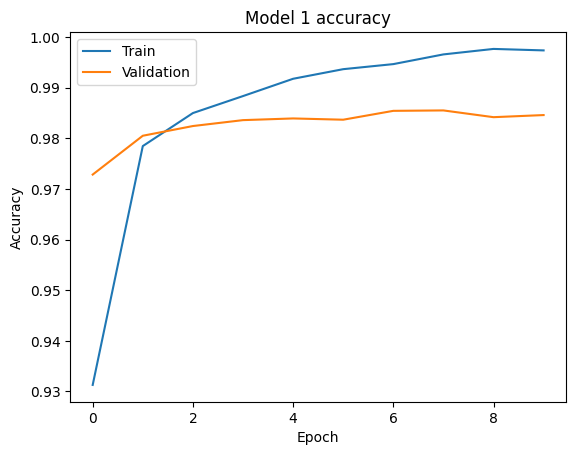

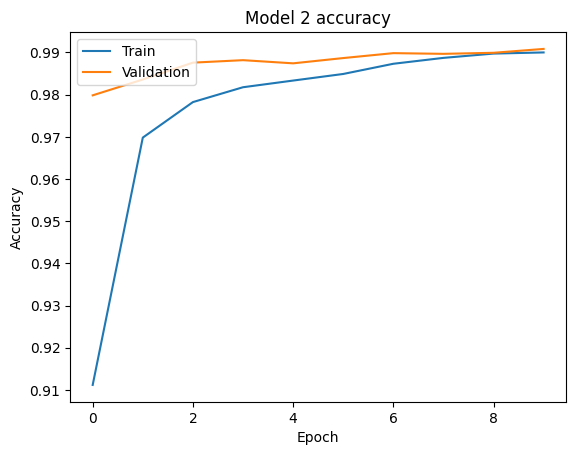

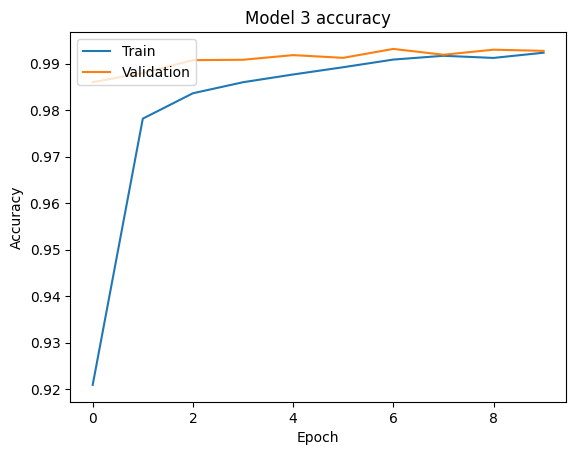

In [15]:
# Step 7: Visualize Model Performance
# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model 1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model 2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model 3 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
# Step 8: Choose the Best Model
#Compare Performance Metrics: Look at the loss and accuracy values on the test set for each model.
#Check Overfitting: Compare training and validation accuracy/loss. A large gap indicates overfitting.
#Complexity vs. Performance: Consider the model's complexity. A simpler model with similar performance to a more complex one might be preferred.
#Training Time: Consider the training time and computational resources required.

In [17]:
# Step 9: Finalize the Best Model
#Given the evaluation metrics and visualizations, choose the model that performs the best on the test data without significant overfitting and with acceptable training time.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


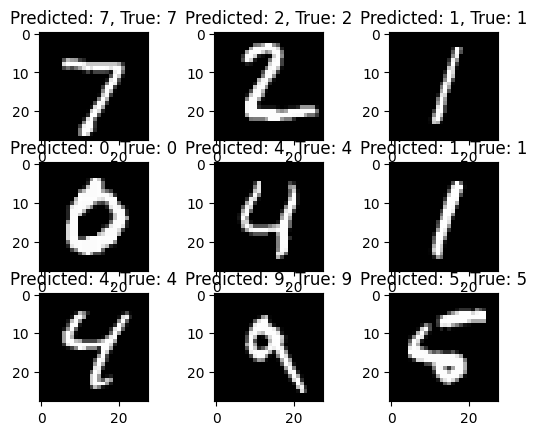

In [18]:
# Step 10: Make Predictions and Visualize
best_model = model2  # By comparing easily to see model2 is the best based on evaluation

predictions = best_model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Visualize some predictions
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.title(f"Predicted: {predicted_classes[i]}, True: {true_classes[i]}")
plt.show()